In [ ]:
import sys
sys.path.insert(0, '..')
from cryspr.calculators import *
from cryspr.utils.predict import random_predict

In [ ]:
res = random_predict(
    reduced_formula="CaTiO3",
    Z_start=1,
    Z_end=6,
    space_group_numbers=[62, 74, 140],
    relax_calculator=CHGNetCalculator(),
    fmax=0.05,
    n_trial_each_space_group=50,
    wdir="./test_predict",
    logfile="test_predict.log",
    relax_logfile_prefix="CaTiO3",
)

In [6]:
energy_info = {}

formula = res[4][0]
atoms_dict: dict = res[4][1]

for spg in atoms_dict.keys():
    energies = []
    for atoms in atoms_dict[spg]:
        energy_per_atom = atoms.get_potential_energy()/len(atoms)
        energies.append(energy_per_atom)
    energy_info[spg] = energies

import pandas as pd
df = pd.DataFrame(
{
    "space_group_number": list(energy_info.keys()),
    "energies": list(energy_info.values()),
}
)

df["Emin"] = df.apply(lambda df: min(df["energies"]), axis=1)
df

/opt/anaconda3/envs/msml/lib/python3.9/site-packages/pymatgen/io/ase.py:256: UserWarning: Only FixAtoms is supported by Pymatgen. Other constraints will not be set.
  warnings.warn(


,space_group_number,energies,Emin
0,62,"[-8.310765266418457, -8.024738311767578, -7.08...",-8.483047
1,74,"[-7.40491247177124, -7.202150344848633, -7.069...",-8.473034
2,140,"[-6.982333660125732, -7.362375259399414, -6.94...",-8.466143


<Axes: xlabel='space_group_number', ylabel='Emin'>

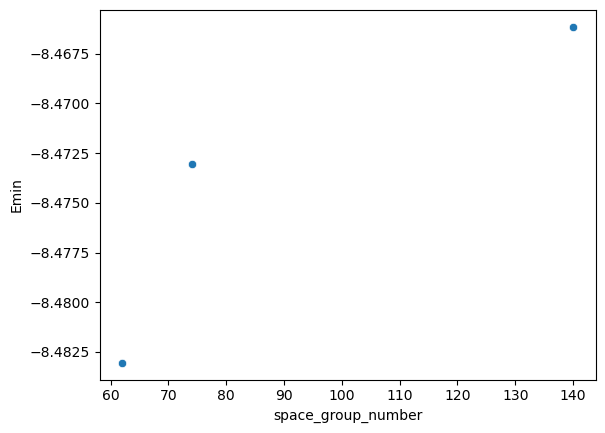

In [7]:
import seaborn as sns
sns.scatterplot(df, x="space_group_number", y="Emin")